# 01. Neural Network Regression with TensorFlow

There are many definitions to a `regression problem`. For our problem, we'll define it simply as predicting a number.

For example, you might want to:

* Predict the selling price of houses given information about them (such as number of rooms, size, number of bathrooms).
* Predict the coordinates of a bounding box of an item in an image.
* Predict the cost of medical insuance for an individual given their demographics (age, sex, gender, race).

In this notebook, we'll set founcdations on how to take samples of inputs, build a neural network to discover patterns in those inputs, then make a prediction based on those inputs.

### What we're going to cover

Specifically, we're going to go through the following with TensorFlow:

* Architecture of a regression model

* Input shapes and output shapes
    * `x`: features/data (inputs)
    * `y`: labels (outputs)

* Creating custom data to view and fit

* Steps in modelling
    * Creating a model
    * Compelling a model
        * Defining a loss function
        * Setting up an optimizer
        * Creating evaluation metrics
    * Fitting a model (getting it to find patterns in our data)

* Evaluating a model
    * Visualizing the model ('visualize, visualize, visualize!')
    * Looking at training curves
    * Compare predictions to ground truth (using our evaluation metrics)

* Saving a model (so we can use it later)

* Loading a model

### How you can use this notebook

You can read through the descriptions of the code, or write it entirely yourself (which is what I'm doing right now).

Don't worry if mistakes happen. It's only way we will get better at the things we do, is by learning our mistakes.

### Typical architecture of a regression neural network

The word *typical* is on purpose. Why?

There are many ways, but more so infinite wys to write neural networks.

Though the following is only a generic setup to ingest a collection of numbers, finding patterns from said numbers, and then outputting some kind of target number. It's pretty vague, but the demonstration will speak for itself.

| HYPERPARAMETER      | TYPICAL VALUE      |
|---------------|---------------|
| Input layer shape | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually `ReLU` (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | `MSE` (mean squared error) or `MAE` (mean absolute error) or `Huber` (combination of MAE/MSE) if outliers present |
| Optimizer | `SGD` (stochastic gradient descent), `Adam` |

Some stuff might not be familiar to you, but this workbook will work through these contents hands-on.

> 🔑 **Note**: A **hyperparamter** in machine learning is something a data analyst or developer can set themselves, where as a **parameter** usually describes something a model learns on its own (a value not explicitly set by an analyst).

**Lets get started!**

To use TensorFlow, we'll impot it as the common alias `tf` (short for TensorFlow).

In [73]:
import tensorflow as tf
print(tf.__version__) # check version, and should be above 2

import datetime
print(f'Notebook was last run at: {datetime.datetime.now()}')

2.18.0
Notebook was last run at: 2025-01-06 20:28:26.328895


### Creating data to view and fit

Since we're working on a **regression problem** (predicting a number), let's create some linear data (a straight line) to model.

In [74]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


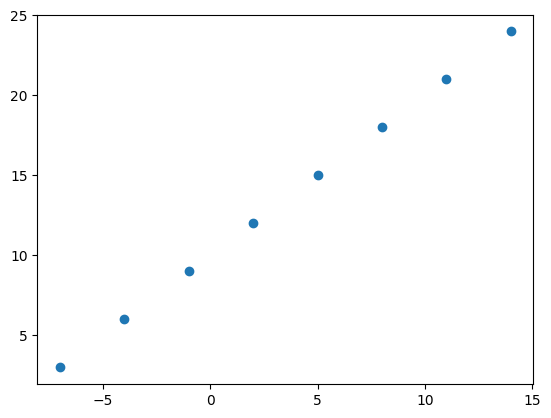

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# create labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualize it
plt.scatter(X, y);

Before we do any modelling, can you calculate the pattern between `X` and `y`?

FOr example, what is `y` value if `X` was 17.0 or -10.0?

This pattern discovery is the bread and butter to what we'll be building neural networks to do for us.

### Regression input shapes and output shapes

One of the most important aspects with working on neural networks is their input and output shapes.

**Input shape**: The data that goes into the model.

**Output shape**: The shape of data you want to come out of your model.

This can differ based on the problem you're working on.

Neural networks accept numbers and output numbers, and they are typically represented as tensors/arrays.

Our previous workbook created data through NumPy arrays, this time we'll do the same to tensors.

In [76]:
# Example input and output shapes of a regression model
house_info = tf.constant(['bedroom','bathroom','garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [77]:
house_info.shape

TensorShape([3])

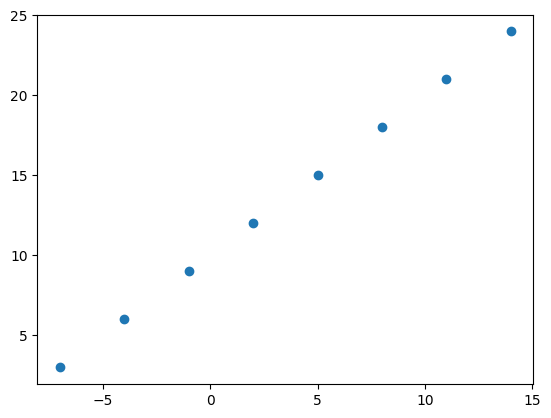

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# create features
X = tf.constant([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# create labels
y = tf.constant([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualize it
plt.scatter(X, y);

Looking back at our x and y graph, we want to use `X` to predict `y`.

Firstly, our `X` is input, and `y` is output.

Knowing this, what do you think your input and output shapes should be?

Let's have a look

In [79]:
# Take a single example of X
input_shape = X[0].shape

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape/1 dimension)

(TensorShape([]), TensorShape([]))

Our returns only shows no shape, which is confusing. So how could this be?

It's because no matter what kind of data we pass to our model, it's always going to take as input and return as output some kind of tensor.

For our case, our dataset is limited to 2 small lists of numbers. We're looking at a special kind of tensor, more specifically a `scalar` at a rank 0 tensor.

In [80]:
# Let's take a look at the single examples individually
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

Our case is trying to build a model, trying to predict the pattern between `X[0]` at `-7.0` and `y[0]` at `3.0`.

We're trying to use 1 `X` value to predict 1 `y` value.

It might seem pretty complicated, and it is. The concept we're covering of inputs and outputs are fundamental to the model.

As a matter of fact, they're probably the thing you'll focus most on while working on neural networks. Trying to make sure the input and output shapes are correct.

It might not make sense now, but you'll later notice how the input and output shapes can be anything you imagine.

![alt text](01-input-and-output-shapes-housing-prices.png)

*An exemplar of building a machine learning algorithm on regression problem (housing prices). Your input shape is `[3]`, stating the number of bedrooms, bathrooms, and garages. Since you're only predicting the price of the house, your output shape is `[1]`.*

### Steps in modelling with TensorFlow

Now we know what data we have, and also the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there is a 3 step process in creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the `Functional/Sequential API`) or import a previously built model (known as tranfer learning).
2. **Compiling a model** - defining how a model's performance should be measured (e.g. `loss` metrics) as well as defining how it should improve (`optimizers`).
3. **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`).

Let's see this in action with `Keras Sequential API` to build a model on regression data. We'll go through step by step.

> **Note**: If you're using Tensorflow 2.7.0+, the `fit()` function no longer upscales data from `(batch_size, )` to `(batch_size, 1)`. To fix this, you'll need to expand the dimension of input data using `tf.expand_dims(input_data, axis=-1)`. What the issue means, is `fit()` used to automatically reshape your inputs from 1D, to 2D. Something your model will expect. But you'll have to manually add this extra dimension after 2.7.0.

> In our case, this means instead of using `model.fit(X, y, epochs=5)`, use `model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)`.

In [81]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([ # forming neural network model by stacking layers sequentially
    tf.keras.layers.Dense(1) # create a fully connected dense layer, using '1' unit (neuron)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error 
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=['mae'])

# Fit the model
# model.fit(X, y, epochs=5) will break TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 11.1485 - mae: 11.1485
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 11.0160 - mae: 11.0160
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 10.8835 - mae: 10.8835
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 10.7510 - mae: 10.7510
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 10.6185 - mae: 10.6185


A quick simple training of a model on `X` and `y`. Let's check how it went.

In [82]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [83]:
# Make a prediction with the model
model.predict(tf.constant([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


array([[14.446515]], dtype=float32)

Doesn't seem to be very accurate...

> **Question**: What's Keras? While working on TensorFlow code, `Keras` comes after `tf` (e.g. `tf.keras.layers.Danse()`)

Before TensorFlow 2.0+, `Keras` was an API designed to be able to build deep learning models with ease. Since TensorFlow 2.0+, its functionality has been tightly integrated into TensorFlow library.

### Improving a model

How do you think you'd improve upon our current model?

Tweaking some of the things from what we've done above is the correct way. To improve the model, we have to alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the learning rate of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more **epochs** (leaving it to train even longer) or on more data (give the model more examples to learn from).

![alt text](02-improving-a-model-from-model-perspective.png)


*There are many ways to improve on a neural network. Most commong changes include: increasing number of layers (deeper networks), increase number of hidden layers (making network wider), and changing learning rate.* *Since these variables are changeable by us, we call them `hyperparameters`. The practice of 'finding the best hyperparameters' is called `hyperparameter tuning`.*

There's a lot of different possibilties, so the most important thing is to remember how you altered each variable, depending on the type of problem.

We will get practical with all of these, but will start simple for now. First step is train our model for longer (everything staying the same).

In [84]:
# Set seed from previous
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# Fit model (we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # train 100 epochs rather than 5

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 679ms/step - loss: 11.6251 - mae: 11.6251
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 11.4926 - mae: 11.4926
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 11.3601 - mae: 11.3601
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 11.2276 - mae: 11.2276
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 11.0951 - mae: 11.0951
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 10.9626 - mae: 10.9626
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 10.8301 - mae: 10.8301
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 10.6976 - mae: 10.6976
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 10.5651 - mae: 10.5651
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 10.4326 - mae: 10.4326
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 10.3001 - mae: 10.3001
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 10.1676 - mae: 10.1676
Epoch 13/100
1/1 ━━━━━━━

You can notice the loss and mae value has decreased from before.

Lets try predict 17.0 again

In [85]:
# Remind ourselves of what X and y are
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [86]:
# Try predict 17.0
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


array([[30.17148]], dtype=float32)

It's gotten closer this time! Correct answer is 27.0 *(y = X + 10)*

Now the model is trained, how can we evaluate it?

### Evaluating a model

A typial workflow you'll go through when building neural networks is:
```
Build a model > evaluate it > tweak the model > evaluate it > tweak the model > evaluate it...
```

### **Visualize, visualize, visualize**

When you come to evaluation, always remember to **visualize, visualize, visualize**...

You're usually better at looking at something, rather than thinking about it through memory.

It's a good idea to visualize:
* **The data** - what data are you working with? What does it look like?
* **The model itself** - what does the architecture look like? What are the diferent shapes?
* **The training of a model** - how does a model perform while it learns?
* **The predictions of a model** - how do the predictions of a model line up against the ground truth (the original labels)?

Let's start by visualizing the model.

But first, we'll create a little bit of a bigger dataset and a new model we can use (the same as before, but we need to practice upon it to get better)

In [87]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [88]:
# Make labels for the dataset (sticking to the pattern from last dataset)
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

we could also make the labels through mathematical operations as well, since we already have the answers

In [89]:
# Same results as above
y = X+10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

### Split data into training/test set

The other most common/important step in machine learning, is creating a training and test dataset. (when required, create a validation set).

Each set serves particular pupose:
* **Training set** - the model learns from this data, and is typically 70-80% of the total available data (aka. the course material of a course)
* **Validation set** - the moel gets tuned on this data, which is typically 10-15% of the total data available (aka. the practice examination from the course)
* **Test set** - the model gets evaluated on this data, to test what it has learnt. Typically 10-15% of the total data available (aka. the proper exam at the end of the course)

We'll use the training and test set for now, we can create them by spitting `X` and `y`.

> **Note**: This step is typically done during the beginning of the project (the test set should always be kept separate from all other data). We want the model to learn on training data and then evaluate it on test data to get an indication of how well it generalizes to unseen examples.

In [90]:
# Check how many samples we have
len(X)

50

In [91]:
# Split the data into train and test sets
X_train = X[:40] # first 40 examples equate to 80% data
y_train = y[:40]

X_test = X[40:] # last 10 samples for test
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

### Visualizing the data

Noe we've got our training and test data, it's a good idea to visualize it.

Let's plot it with some nice colours to differentiate what's what.

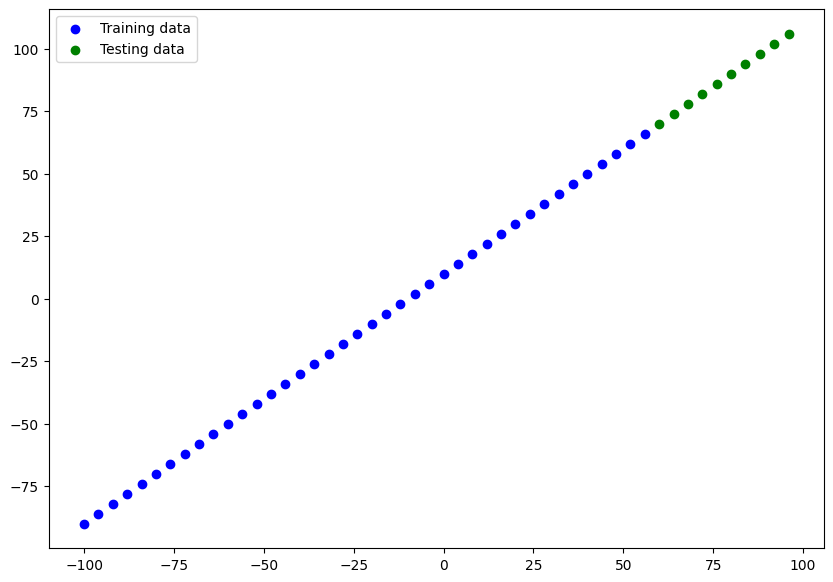

In [92]:
pd.DataFrame(history.history).plot()

Anytime you visualize data or anything, it's a very good idea to help understand what you're working with.

With this graph in mind, what we wanna try and do is get the ML model to learn the patterns of the blue dot, to then predict our green dots.

Time to build the model! We'll make the exact same one from before.

In [93]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

#model.fit(X_train, y_train, epochs=100) commenting out, not commiting to it just yet.

### Visualizing the model

After you've built a model, you might want to take a look at it (especially if you haven't build many before).

You can take a look at the layers and shapes of your model by calling `summary()` on it.

> **Note**: Visualizing a model is particularly helpful when you run into input and output shape mismatches.

In [94]:
# No useful info (as the model is not fit/built)
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

The cell gave an output, but is inconclusive in info. Doesn't know output shape, 0 parameters, and says its `(unbuilt)`

We also haven't told it what input shape it should be expecting.

Remember how we stated our input shape is just one number?

We can let our model know the input shape of our data using the `input_shape` parameter to the first layer (usually if `input_shape` isn't defined, Keras tried to figure it out automatically).

In [95]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

c:\Users\capma\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [96]:
# this will work after specifing the input shape
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Calling `summary()` on the model shows the layer that it contains. The output shape and the number of parameters.

* **Total params** - total number of parameters in the model
* **Trainable params** - thesse are the paraeters (patterns) the model can update as it trains.
* **Non-trainable params** - these parameters aren't updated during training (this is typical when bringing in already learned patterns from pre-existing models during transfer learning).

> **Exercise**: Try playing around with the number of hidden units in the `Dense` layer (e.g. `Dense(3)`), and how it affects the change in total/trainable params. Investigate what's causing the change.

In [97]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]),
    tf.keras.layers.Dense(3)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [98]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 3)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8 (32.00 B)

 Trainable params: 8 (32.00 B)

 Non-trainable params: 0 (0.00 B)

So how are these parameters calculated?

`(Inputs * Neurons) + Bias = Total Parameters`

Let's go through step by step:

Calculation of parameters is done by each layer in the model. Let's start with `dense_9`, where we stated it's input shape as `[1]`, and Dense is `[1]`, stating the number of neurons. `Bias` is equal to the number of `Neurons`, making it also `[1]`. Making `(1*1) + 1 = 2`.

Looking at `dense_10`, input shape is `[1]` as it's initialized in the beginning, then with `[3] Neurons` therefore `[3] Biases`. Making `(1*3) + 3 = 6`.

So what is bias though?

It's an additional parameter added to the output of the weighted sum of the inputs. Helps the model fit the data better, by providing additional flexibility for learning. It;s like an interception in linear regression, increasing mode accuracy, especially with non-linear relationships.

Keep in mind that these parameters are capable of learnable patterns in the data.

Let's reinstantiate the previous model, and fit our model with the training data.

In [99]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [100]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=2) # verbose displays info on the current model training

Epoch 1/100
2/2 - 1s - 406ms/step - loss: 31.7495 - mae: 31.7495
Epoch 2/100
2/2 - 0s - 41ms/step - loss: 8.7737 - mae: 8.7737
Epoch 3/100
2/2 - 0s - 48ms/step - loss: 9.8831 - mae: 9.8831
Epoch 4/100
2/2 - 0s - 43ms/step - loss: 11.2861 - mae: 11.2861
Epoch 5/100
2/2 - 0s - 48ms/step - loss: 8.8496 - mae: 8.8496
Epoch 6/100
2/2 - 0s - 49ms/step - loss: 9.9590 - mae: 9.9590
Epoch 7/100
2/2 - 0s - 39ms/step - loss: 11.4157 - mae: 11.4157
Epoch 8/100
2/2 - 0s - 43ms/step - loss: 8.9255 - mae: 8.9255
Epoch 9/100
2/2 - 0s - 39ms/step - loss: 10.0349 - mae: 10.0349
Epoch 10/100
2/2 - 0s - 38ms/step - loss: 11.5453 - mae: 11.5453
Epoch 11/100
2/2 - 0s - 39ms/step - loss: 9.0014 - mae: 9.0014
Epoch 12/100
2/2 - 0s - 43ms/step - loss: 10.1107 - mae: 10.1107
Epoch 13/100
2/2 - 0s - 37ms/step - loss: 11.7109 - mae: 11.7109
Epoch 14/100
2/2 - 0s - 39ms/step - loss: 12.4390 - mae: 12.4390
Epoch 15/100
2/2 - 0s - 34ms/step - loss: 8.0917 - mae: 8.0917
Epoch 16/100
2/2 - 0s - 36ms/step - loss: 9.804

In [101]:
# Check the model summary
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Along with summary, you can also view a 2D plot of the model using `plot_model()`.

In [102]:
import pydot
import graphviz

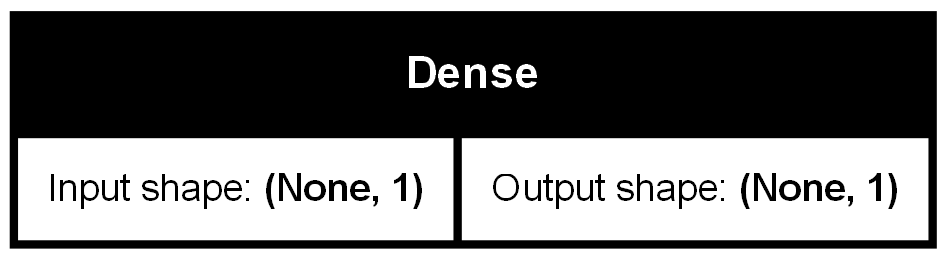

In [103]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In our case, our model only has an input and an output. But visualizing more complicated models can be very helpful for debugging.

### Visualizing the predictions

Now we've got a trained model, let's visualize some predictions.

To visualize predictions, it's always a good iea to plot them against the ground truth labels.

Often you'll see this in the for of `y_test` vs `y_pred` (ground truth vs. predictions).

First we'll make some predictions on the test data (`X_test`), remember the model has never seen the test data.

In [104]:
# Make predictions
y_preds = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


In [105]:
# View the predictions
y_preds

array([[ 68.68158 ],
       [ 73.166855],
       [ 77.65213 ],
       [ 82.137405],
       [ 86.62268 ],
       [ 91.10794 ],
       [ 95.593216],
       [100.07849 ],
       [104.56377 ],
       [109.04904 ]], dtype=float32)

We got a list of predictions. Now how does this compare to the truth labels?

Let's build a plotting function to find out

> **Note**: If you think you're going to be visualizing something a lot, its a good idea to functionize it so you can use it later.

In [106]:
# Define function for plot creation of our y = X + 10 graph
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
    """
    Plots training data, test data and compre predictions.
    """
    plt.figure(figsize=(10,7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c='b', label='Training data')
    # Plot test data in green
    plt.scatter(test_data, test_labels, c='g', label='Testing data')
    # Plot predictions in red
    plt.scatter(test_data, predictions, c='r', label='Prediction data')
    # Show legend
    plt.legend();

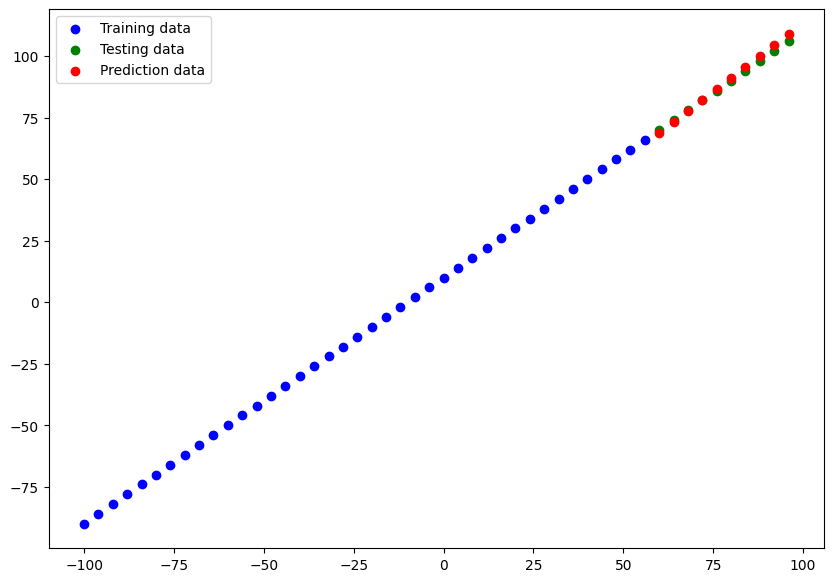

In [107]:
plot_predictions(train_data=X_train,
                train_labels=y_train,
                test_data=X_test,
                test_labels=y_test,
                predictions=y_preds)

We're getting pretty close with our predictions!

### Evaluating predictions

Alongside visualizations, evaluation metrics are a good alternative option for evaluating models. Depending on your problem, your evaluation metrics will differ.

Two of the main metrics used for regression problems are:

* **Mean absolute error (MAE)** - the mean difference between each of the predictions.
* **Mean squared error(MSE)** - the squared mean difference between the predictions (use if larger errors are more detrimental than smaller errors).

The lower each of these values, the better.

You can also use `model.evaluate()` which will return the loss of the model, as well as any metrics setup during the compiling step.

In [108]:
# Evaluate the moel on the test set
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - loss: 1.3652 - mae: 1.3652


[1.365197777748108, 1.365197777748108]

In our case, we set out loss to mae, and metrics for mae. Therefore `model.evaluate()` returned both values.

TensorFlow also has built in functions for MSE and MAE.

For many evaluation functions, the premise is the same: compare predictions to the true labels.

In [ ]:
# Compute the MAE for each value
y_preds_squeezed = tf.squeeze(y_preds) # flatten from 2D array to 1D, so it can compare with y_test, whom is also 1D array

mae_per_sample = tf.abs(y_test - y_preds_squeezed)
mae_per_sample


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1.3184204 , 0.83314514, 0.34786987, 0.1374054 , 0.62268066,
       1.1079407 , 1.593216  , 2.0784912 , 2.5637665 , 3.0490417 ],
      dtype=float32)>

In [117]:
y_test, y_preds

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([[ 68.68158 ],
        [ 73.166855],
        [ 77.65213 ],
        [ 82.137405],
        [ 86.62268 ],
        [ 91.10794 ],
        [ 95.593216],
        [100.07849 ],
        [104.56377 ],
        [109.04904 ]], dtype=float32))

In [118]:
y_test.shape, y_preds.shape

((10,), (10, 1))

> **Note**: If you're comparing two tensors, it's important that both of them are of the same shape. Always be on the lookout, as *many* errors occur this way due to mismatched tensors.

In [121]:
# Instantiate MeanAbsoluteError metric
mae_fn = tf.keras.metrics.MeanAbsoluteError()
mae = mae_fn(y_test, y_preds)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.365197777748108>

In [123]:
# Instantiate MeanSquaredError metric
mse_fn = tf.keras.metrics.MeanSquaredError()
mse = mse_fn(y_test, y_preds)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=2.691553831100464>

We can also calculate the MAE using pure TensorFlow functions.

In [125]:
# Returns the same as tf.keras.metrics.MeanAbsoluteError()
tf.reduce_mean(tf.abs(y_test-y_preds.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=1.36519775390625>

Again it's good functionize anything that you'll use often. So we'll do that for mae and mse.

In [134]:
def mae(y_test, y_preds):
    mae_fn = tf.keras.metrics.MeanAbsoluteError()
    MAE = mae_fn(y_test, y_preds)
    return MAE


def mse(y_test, y_preds):
    mse_fn = tf.keras.metrics.MeanSquaredError()
    MSE = mse_fn(y_test, y_preds)
    return MSE

### Running experiments to imrpove a model

After seeing the evaluation metrics and predictions from the model, you'd likely want to find a way to further improve upon it.

There are 3 main ways to improve upon it:
1. **Get more data** - more examples for your model to train on, therefore more opportunities to learn
2. **Make your model larger/complex** - This can mean creating more layers or more hidden units/neurons in each layer.
3. **Train for longer** - give your model more of a chance to find the patterns in the data.

Since we created our dataset, we coul easily make more data but this isn't always he case when you're working with real-world datasets.

So we'll see how we can improve the model using point 2 and 3.

To do so, we'll build 3 models and compare their results:
1. `model_1` - same as original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

Build `model_1`

In [130]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 111.8070 - mae: 111.8070
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 76.6387 - mae: 76.6387
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 41.5783 - mae: 41.5783
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 10.7444 - mae: 10.7444
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 7.6797 - mae: 7.6797
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 11.9079 - mae: 11.9079
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 8.0345 - mae: 8.0345
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 9.7246 - mae: 9.7246
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 8.0166 - mae: 8.0166
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 9.7129 - mae: 9.7129
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7.9988 - mae: 7.9988
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 9.7013 - mae: 9.7013
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━

let's evaluate and visualize its performance

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


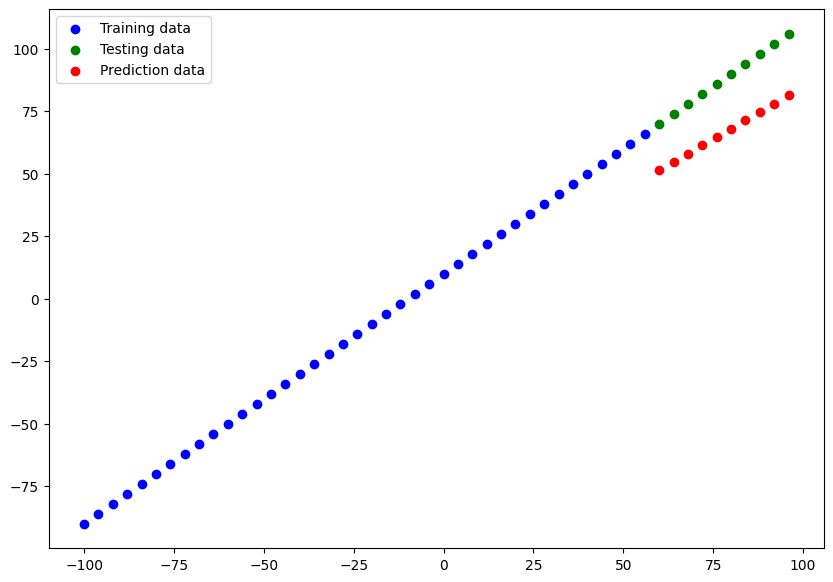

In [ ]:
# plot model_1 predictions
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [135]:
# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(np.float32(21.587269), np.float32(469.65347))

### Build `model_2`

This time we'll add an extra dense layer (so no wour model will have 2 layers) whilst keeping everything else the same.

In [136]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1) # add a second layer
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=2)

Epoch 1/100
2/2 - 1s - 452ms/step - loss: 104.5220 - mae: 104.5220
Epoch 2/100
2/2 - 0s - 31ms/step - loss: 42.0947 - mae: 42.0947
Epoch 3/100
2/2 - 0s - 27ms/step - loss: 18.5859 - mae: 18.5859
Epoch 4/100
2/2 - 0s - 30ms/step - loss: 15.1421 - mae: 15.1421
Epoch 5/100
2/2 - 0s - 23ms/step - loss: 11.6036 - mae: 11.6036
Epoch 6/100
2/2 - 0s - 23ms/step - loss: 14.9412 - mae: 14.9412
Epoch 7/100
2/2 - 0s - 27ms/step - loss: 11.5303 - mae: 11.5303
Epoch 8/100
2/2 - 0s - 29ms/step - loss: 14.8735 - mae: 14.8735
Epoch 9/100
2/2 - 0s - 23ms/step - loss: 11.5060 - mae: 11.5060
Epoch 10/100
2/2 - 0s - 25ms/step - loss: 14.8573 - mae: 14.8573
Epoch 11/100
2/2 - 0s - 23ms/step - loss: 11.4988 - mae: 11.4988
Epoch 12/100
2/2 - 0s - 23ms/step - loss: 14.8584 - mae: 14.8584
Epoch 13/100
2/2 - 0s - 25ms/step - loss: 11.4956 - mae: 11.4956
Epoch 14/100
2/2 - 0s - 24ms/step - loss: 14.8623 - mae: 14.8623
Epoch 15/100
2/2 - 0s - 26ms/step - loss: 11.4907 - mae: 11.4907
Epoch 16/100
2/2 - 0s - 31ms/st

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


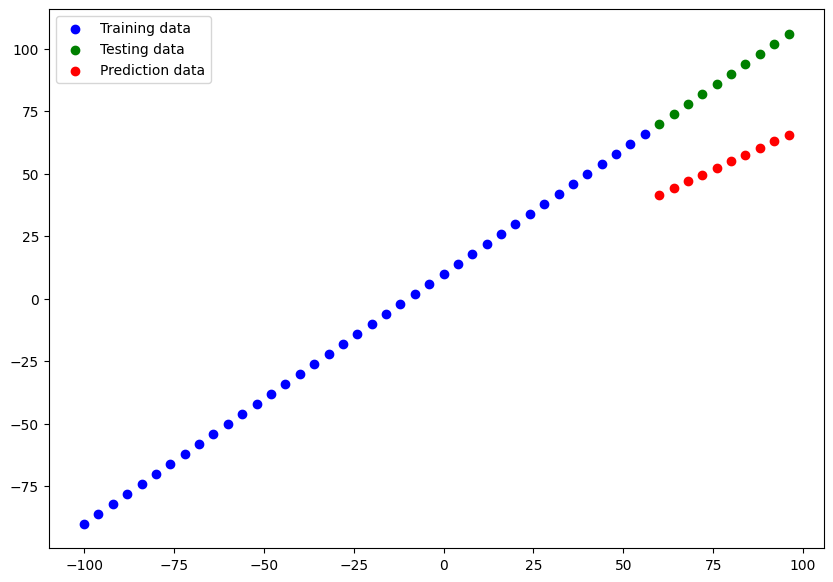

In [137]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [138]:
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()

mae_2, mse_2

(np.float32(34.31039), np.float32(1191.8109))

hmmmm the results don't seem so promising with a second dense layer. Let's try `model_3`

In [140]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

model_3.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 98.7811 - mae: 98.7811   
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 34.0811 - mae: 34.0811
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 11.9653 - mae: 11.9653
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 13.1358 - mae: 13.1358
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 15.3755 - mae: 15.3755
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 10.5257 - mae: 10.5257
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11.5457 - mae: 11.5457
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 12.6164 - mae: 12.6164
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 14.3387 - mae: 14.3387
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 11.4787 - mae: 11.4787
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 12.5382 - mae: 12.5382
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 14.2604 - mae: 14.2604
Epoch 13/500
2/2 ━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


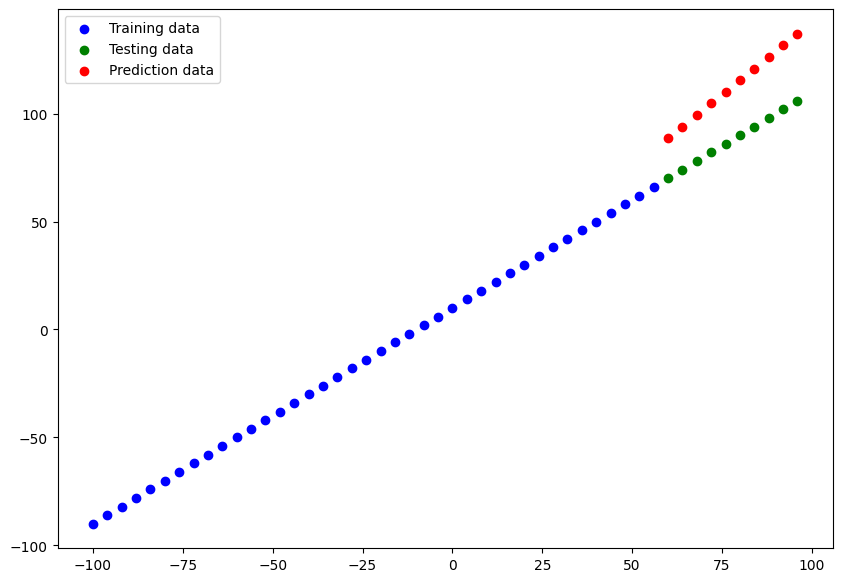

In [141]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

looks a bit like `model_1` except it overestimated the results!

In [142]:
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()

mae_3, mse_3

(np.float32(24.774185), np.float32(629.3079))

### Comparing results

Now we've got results for 3 similar but slightly different results, let's compare them.

In [143]:
model_results = [['model_1', mae_1, mse_1],
                 ['model_2', mae_2, mse_2],
                 ['model_3', mae_3, mse_3]]

In [146]:
# create a pandas data frame to display our model results together
import pandas as pd
all_results = pd.DataFrame(model_results, columns=['model', 'mae', 'mse'])
all_results

,model,mae,mse
0,model_1,21.587269,469.653473
1,model_2,34.310390,1191.810913
2,model_3,24.774185,629.307922


It seems `model_1` has the best performance.

It can feel tedious and repetitive and that we wasted time training other models, when the first one was most accurate. But it's all part of experimenting and finding the best optimization to the correct results. Without experimenting and trying, you'll never know which options worked or not!

> **Note**: One of your main goals is minimize time spent in between each experiment. The more you figure out what doesn't work, the more you figure out what could work inplace instead. 'Experiment, experiment, experiment'.

You'll find that certain things you thought will improve the model, will not always happen.

### Tracking your experiments

One really good habit to get into, is tracking your modelling experiments to see which perform better than others. Aka the stuff we did above us!

But building and storing these models can become difficult and complex, especially with visualizing the results and whats changed in them.

* **TensorBoard** - is a component from TensorFlow library to help track madelling experiments (and is something we'll get into soon).
* **Weights and Biases** - is a tool for tracking all kinds of machine learning experiments (and also plugs into TensorBoard).

### Saving a model

Once you've trained a model and found one which performs most similar to the end result you want, you'll probably want to save it for use elseqhere.

You can save a TensorFlow/Keras model using `model.save()`.

There are two ways to save a model in TensorFlow.

1. The `SavedModel format` (default)
2. The `HDF5 format`

Main difference is `SavedModel format` automatically saves custom objects (e.g. special layers) without additional mads when loading the model back in.

Which to use?

Depends on your situation/problem, but `SavedModel` will do its job most of the time.

Both methods use the same method call.

In [168]:
# Save the best model using SavedModel format * keras format
model_1.save('best_model.keras')

In [169]:
# let's check out what stuff the file outputs
!dir best_model.keras

 Volume in drive F is Extreme SSD
 Volume Serial Number is CE95-62AC

 Directory of f:\main shit\Code stuffz\tensorflow ztm\01 notebook

09/01/2025  08:02 pm            14,405 best_model.keras
               1 File(s)         14,405 bytes
               0 Dir(s)  1,226,752,131,072 bytes free


Now let's save the model in the HDF5 format, we'll use the same method but with a diferent filename.

In [157]:
# Save model using HDF5 format
model_1.save('best_model_HDF5_format.h5')

In [159]:
!dir best_model_HDF5_format.h5

 Volume in drive F is Extreme SSD
 Volume Serial Number is CE95-62AC

 Directory of f:\main shit\Code stuffz\tensorflow ztm\01 notebook

09/01/2025  07:48 pm            16,280 best_model_HDF5_format.h5
               1 File(s)         16,280 bytes
               0 Dir(s)  1,226,754,228,224 bytes free


### Loading a model

We can load a saved model using the `load_model()` method.

Loading a model for the different formats (SavedModel and HDF5) is the same. Just make sure their pathnames are correct so you can distinguish them.

In [170]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model('best_model.keras')
loaded_saved_model.summary()

c:\Users\capma\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6 (28.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4 (20.00 B)

### **NOTE**: SavedModel is not viable for reimplimenting into your workbook. It functions more as a inference tool, and has become legacy. We will .keras in replacement

now let's test it out

In [ ]:
# Compare model_1 with the SavedModel version (should return True)
model_1_preds = model_1.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_1_preds.squeeze()).numpy()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


np.True_

In [178]:
# Load model from hdf5 format
loaded_h5_model = tf.keras.models.load_model('best_model_HDF5_format.h5')
loaded_h5_model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [179]:
# Then compare with HDF5
h5_model_preds = loaded_h5_model.predict(X_test)
mae(y_test, h5_model_preds.squeeze()).numpy() == mae(y_test, model_1_preds.squeeze()).numpy()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


np.True_

### A larger example

We've now seen the fundamentals of building neural network regression models in TensorFlow.

Let's step it up a notch and build a model for a more feature rich dataset.

More specifically, we're going to try predict the cost of medical insurance for individals based on a number of different parameters such as `age, sex, bmi, children, smoking_status` and `residential_region`.

To practice, we'll use the [Medical Cost dataset](https://www.kaggle.com/mirichoi0218/insurance) available from Kaggle.

> **Note**:When learning machine learning paradigms, you'll often go through a series of foundational techniques and then practice them by working with open-source datasets and examples. Everytime you work on something new, it's a good iea to search something like 'problem X example with Python/TensorFlow'. Substitute X with your problem.

In [196]:
# import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [181]:
# read in the insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [184]:
# checkout the insurance dataset
insurance.head(), insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(   age     sex     bmi  children smoker     region      charges
 0   19  female  27.900         0    yes  southwest  16884.92400
 1   18    male  33.770         1     no  southeast   1725.55230
 2   28    male  33.000         3     no  southeast   4449.46200
 3   33    male  22.705         0     no  northwest  21984.47061
 4   32    male  28.880         0     no  northwest   3866.85520,
 None)

We will need to turn the non-numerical columns into numbers, as neural networks can't handle non-numerical inputs.

We'll use `get_dummies()` method, which one-hot encodes them.

In [185]:
# turn all categories into numbers
insurance_one_hot = pd.get_dummies(insurance, dtype=int) # output one hot encoding to 0 and 1, instead of true or false
insurance_one_hot.head() # viewing converted columns

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


now we'll split them into x and y datasets.

In [186]:
# create x and y values
X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']

In [187]:
# view features
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


then create train and test sets. To make things easier, we'll leverage the already available `train_test_split` function available from Scikit-learn.

In [197]:
# create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42) # this equals to seed from TensorFlow

In [193]:
pip install scikit-learn


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 932.9 kB/s eta 0:00:12
   - -------------------------------------- 0.5/11.1 MB 932.9 kB/s eta 0:00:12
   --- ------------------------------------ 1.0/11.1 MB 1.1 MB/s eta 0:00:09
   --- ------------------------------------ 1.0/11.1 MB 1.1 MB/s eta 0:00:09
   ---- ----------------------------------- 1.3/11.1 MB 986.4 kB/s eta 0:00:10
   ---- ----------------------------------- 1.3/11.1 MB 986.4 kB/s eta 0:00:10
   ------ --------------------------------- 1.8/11.1 MB 931.8 kB/s eta 0:00:10
   ------- -------------------------------- 2.1/11.1 MB 1.0 MB/s eta 0:00:09
   -------- ------------------------------- 2.4/11.1 MB 1.1 MB/s eta 0:00:09
   --------- ------------------------------ 2.6/11.1 MB 1.1 MB/s eta 0:00:08
   -------

Now we can build and fit a model (we'l make it the same as `model_1`).

In [198]:
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 13088.1787 - mae: 13088.1787
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12237.7803 - mae: 12237.7803
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11399.9346 - mae: 11399.9346
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10618.7432 - mae: 10618.7432
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9948.9141 - mae: 9948.9141   
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9377.0195 - mae: 9377.0195
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8890.0195 - mae: 8890.0195 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8485.7881 - mae: 8485.7881 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8159.4771 - mae: 8159.4771 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7903.6421 - mae: 7903.6421 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7704.2168 - mae: 7704.2168
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━

In [199]:
# check the results of the insurance model
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7161.8813 - mae: 7161.8813  


[6993.14501953125, 6993.14501953125]

Our model is performing not so great

We'll try 4 different things to see if it makes a difference:
* Increasing the number of layers (1 > 3)
* Increasing the number of units in each layer (except for the output layer)
* Changing the optimzer (from SGD to Adam)
* Increase number of epochs (from 100 to 1000)

Everything else will stay the same

In [204]:
# modify our previous model to hopefully improve results
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

history = insurance_model_2.fit(X_train, y_train, epochs=1000, verbose=2)

Epoch 1/1000
34/34 - 1s - 40ms/step - loss: 13277.7891 - mae: 13277.7891
Epoch 2/1000
34/34 - 0s - 3ms/step - loss: 13090.4238 - mae: 13090.4238
Epoch 3/1000
34/34 - 0s - 3ms/step - loss: 12696.7588 - mae: 12696.7588
Epoch 4/1000
34/34 - 0s - 3ms/step - loss: 11943.8545 - mae: 11943.8545
Epoch 5/1000
34/34 - 0s - 3ms/step - loss: 10736.6748 - mae: 10736.6748
Epoch 6/1000
34/34 - 0s - 3ms/step - loss: 9290.2334 - mae: 9290.2334
Epoch 7/1000
34/34 - 0s - 3ms/step - loss: 8051.4590 - mae: 8051.4590
Epoch 8/1000
34/34 - 0s - 3ms/step - loss: 7516.7168 - mae: 7516.7168
Epoch 9/1000
34/34 - 0s - 3ms/step - loss: 7440.2983 - mae: 7440.2983
Epoch 10/1000
34/34 - 0s - 3ms/step - loss: 7417.6709 - mae: 7417.6709
Epoch 11/1000
34/34 - 0s - 3ms/step - loss: 7397.5889 - mae: 7397.5889
Epoch 12/1000
34/34 - 0s - 3ms/step - loss: 7377.1714 - mae: 7377.1714
Epoch 13/1000
34/34 - 0s - 3ms/step - loss: 7356.5693 - mae: 7356.5693
Epoch 14/1000
34/34 - 0s - 3ms/step - loss: 7335.8550 - mae: 7335.8550
Epoc

In [205]:
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3209.8086 - mae: 3209.8086  


[3162.2900390625, 3162.2900390625]

The results are looking much better!

> **Note**: for many problems, the Adam optimizer is a great starting choice.

Let's check out the loss curvs of our model, we should see a downward trend.

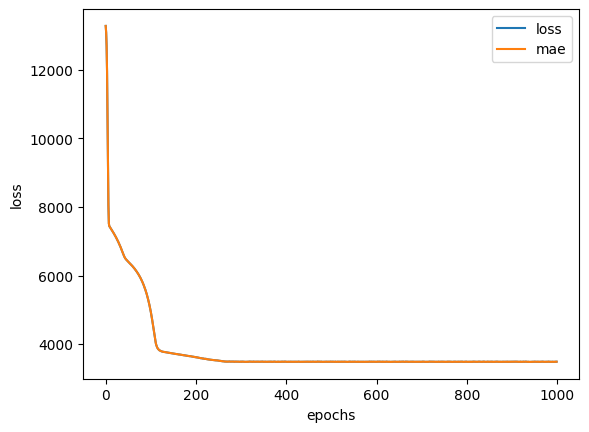

In [212]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs');

From the looks of the graph, the model's loss and MAE are both decreasing as epoch continues. (Our loss is the same to MAE, hence only one line as they overlap each other).

But we do notice that it starts to flatline past epoch 150, and practically stops by 250 epochs.

> **Question**: How long should you train for?

> Again it depends on your problem. Sometimes it doesn't take long to train an epoch, and you can run 1000 of them like the one above. But there's a common time saver called `EarlyStoping callback`, where training terminates if there is no improvement for a period of time.

Let's train the same model as above a little longer and call fit again to see what changes arise.

In [213]:
# Try training for a little longer (100 more epochs)
history_2 = insurance_model_2.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100
34/34 - 0s - 3ms/step - loss: 3484.8079 - mae: 3484.8079
Epoch 2/100
34/34 - 0s - 3ms/step - loss: 3487.0781 - mae: 3487.0781
Epoch 3/100
34/34 - 0s - 3ms/step - loss: 3488.5188 - mae: 3488.5188
Epoch 4/100
34/34 - 0s - 3ms/step - loss: 3487.7798 - mae: 3487.7798
Epoch 5/100
34/34 - 0s - 3ms/step - loss: 3484.8125 - mae: 3484.8125
Epoch 6/100
34/34 - 0s - 3ms/step - loss: 3483.7520 - mae: 3483.7520
Epoch 7/100
34/34 - 0s - 3ms/step - loss: 3483.7532 - mae: 3483.7532
Epoch 8/100
34/34 - 0s - 3ms/step - loss: 3484.0811 - mae: 3484.0811
Epoch 9/100
34/34 - 0s - 3ms/step - loss: 3483.3481 - mae: 3483.3481
Epoch 10/100
34/34 - 0s - 3ms/step - loss: 3484.4082 - mae: 3484.4082
Epoch 11/100
34/34 - 0s - 3ms/step - loss: 3483.6821 - mae: 3483.6821
Epoch 12/100
34/34 - 0s - 5ms/step - loss: 3482.8848 - mae: 3482.8848
Epoch 13/100
34/34 - 0s - 3ms/step - loss: 3484.9294 - mae: 3484.9294
Epoch 14/100
34/34 - 0s - 3ms/step - loss: 3485.6125 - mae: 3485.6125
Epoch 15/100
34/34 - 0s - 3ms

In [214]:
# Evaluatge the model trained for another 100 epochs
insurance_model_2_loss, insurance_model_2_mae = insurance_model_2.evaluate(X_test, y_test)
insurance_model_2_loss, insurance_model_2_mae

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3209.7100 - mae: 3209.7100 


(3161.68359375, 3161.68359375)

Only got about 1 point closer. Practically no improvement can be made beyond this specific model.

How does it look visually though?

Text(0.5, 0, 'epochs')

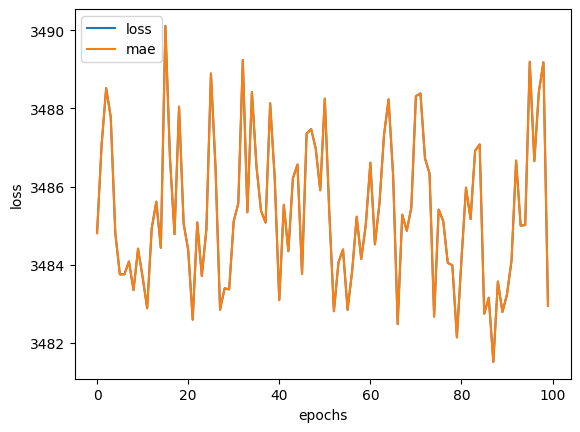

In [215]:
pd.DataFrame(history_2.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs') # epochs will only show 100, as we have created a separate history log from the first

### Preprocessing data (normalization and standardization)

A common practice when working with neural networks, is making sure all values in the data range from 0 to 1.

This is called **normalization**, where we scale the feature's min and max, to 0 and 1 respectively.

There is another process called **standardization** which converts all of your data to unit variance, where 0 is mean. Basically **standard deviation**.

These two practices are often part of the preprocessing pipeline, where you prepare your data for use with neural networks.

Knowing this, some of the major steps you'll take to preprocess your data for a neural network include:
* Turning all of your data to numbers (a neural network can't handle strings).
* Making sure your data is in the right shape (by verifying its input and output shapes).
* **Feature Scaling**:
    * Normalizing data
    * Standardization
    * But which to use?
        * Neural networks tend to favour normalization, with its scaling of 0 to 1. Scaling is a bit different and lies outside the bounds of 0 and 1 sometimes.

Back to our data, we've done `get_dummies()` and made all values numerical. Let's see how we'd normalize it as well.

In [216]:
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [217]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We'll need to one hot encode like before, but this time also normalize the numerical columns.

To do this, we're going to use a few classes from Scikit-Learn:
* `make_column_transformer` - build a multi-step data preprocessing function for the following transformations.
    * `MinMaxScaler` - make sure all numerical columns are normalized
    * `OneHotEncoder` - one hot encode the non-numerical columns.
    
Let's see them in action

In [218]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# create a column transformer (will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), # gets all values between 0 and 1
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])) # handle_unknown > function asking us what to do with columns not listed inside. 'ignore' has us skip the other columns without returning errors

# Create X and y
X = insurance.drop('charges', axis=1)
y = insurance['charges']

# build our train and test sets, use same random split to ensure same splitting of values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and one hot encodint (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

Now we've normalized it and one-hot encoding it, what does our data look like now?

In [219]:
# Viewing our non normalized, non one hot encoded data
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [221]:
# Viewing our normalized, one hot encoded data
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

Let's look at the shapes

In [222]:
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

We see some extra columns in our `X_train_normal` set, because of our one hot encoded columns stating 0 and 1, for each possible non-numerical options.

Noe let's model our normalized data. We'll use the same setup for our previous training.

In [224]:
tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

history_3 = insurance_model_3.fit(X_train_normal, y_train, epochs=1000, verbose=2)

Epoch 1/1000
34/34 - 2s - 60ms/step - loss: 13343.6221 - mae: 13343.6221
Epoch 2/1000
34/34 - 0s - 4ms/step - loss: 13335.4219 - mae: 13335.4219
Epoch 3/1000
34/34 - 0s - 6ms/step - loss: 13314.5000 - mae: 13314.5000
Epoch 4/1000
34/34 - 0s - 4ms/step - loss: 13270.0186 - mae: 13270.0186
Epoch 5/1000
34/34 - 0s - 5ms/step - loss: 13191.0635 - mae: 13191.0635
Epoch 6/1000
34/34 - 0s - 4ms/step - loss: 13066.9395 - mae: 13066.9395
Epoch 7/1000
34/34 - 0s - 4ms/step - loss: 12887.2949 - mae: 12887.2949
Epoch 8/1000
34/34 - 0s - 4ms/step - loss: 12642.0742 - mae: 12642.0742
Epoch 9/1000
34/34 - 0s - 3ms/step - loss: 12321.4688 - mae: 12321.4688
Epoch 10/1000
34/34 - 0s - 4ms/step - loss: 11919.8945 - mae: 11919.8945
Epoch 11/1000
34/34 - 0s - 4ms/step - loss: 11444.9443 - mae: 11444.9443
Epoch 12/1000
34/34 - 0s - 4ms/step - loss: 10938.0293 - mae: 10938.0293
Epoch 13/1000
34/34 - 0s - 4ms/step - loss: 10436.6338 - mae: 10436.6338
Epoch 14/1000
34/34 - 0s - 4ms/step - loss: 9941.1543 - mae

Let's evaluate the model on normalized test set.

In [226]:
# evaluate our 3rd model
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3212.9685 - mae: 3212.9685  


let's also take a look at visualizing the model's improvement over epochs.

Text(0.5, 0, 'epochs')

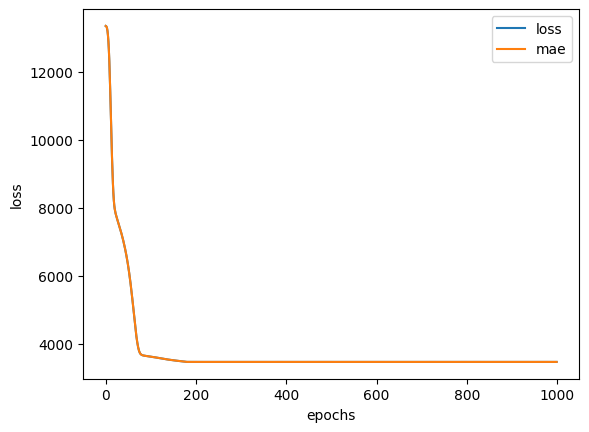

In [225]:
pd.DataFrame(history_3.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

And finally, let's compare the results from `insurance_model_2` with `insurance_model_3`

In [227]:
insurance_model_2_mae, insurance_model_3_mae

(3161.68359375, 3159.3564453125)

From this, we can see how normalizing the data makes a bit of an improvement than when not normalized.

This is one of the main benefits of normalization, **faster convergence time** where the model gets better results faster, as visualized from the graph. Though it could only reach a certain point in its improvement before it flattens out like the other model.

When left training long enough like what we did above, they are practically the same in terms of accuracy.

Results may change if we continue playing with the model's architecture, like more hidden units. But since our main goal as neural network practicioners is to decrease the time spent between experiments, anything that helps us get to better results faster is a plus.

## Excercises

We've covered quite a bit, but now its time to build up your intuition and play around some more with what we've worked on.

Emphasis on the word play, as it's very important to try a few things out, run the code and see what happens.

1. Create your own regression dataset(or make the one we created in 'create data to view and fit' bigger) and fit a model to it.
2. Try building a neural network with 4 dense layers and fitting it to your own regression dataset, how does it perform?
3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
* Building a larger model (how does one with 4 dense layers perform?)
* Increasing the number of units in each layer
* Lookup the documentation of `Adam` and find out what the first parameter is, what happens if you increase it by 10x?
* What happens if you train for longer (say 300 epochs instead of 200)?
4. Import the [Bostom pricing dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data) from TensorFlow `tf.keras.datasets` and model it.